<a href="https://colab.research.google.com/github/SB-new/Building-Large-Language-Model/blob/main/Multi_Head_Attention_With_Weight_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
    [0.55, 0.87, 0.66], # journey  (x^2)
    [0.57, 0.85, 0.64], # starts    (x^3)
    [0.22, 0.58, 0.33], # with      (x^4)
    [0.77, 0.25, 0.10], # one       (x^5)
    [0.05, 0.80, 0.55]] # step      (x^6)
)

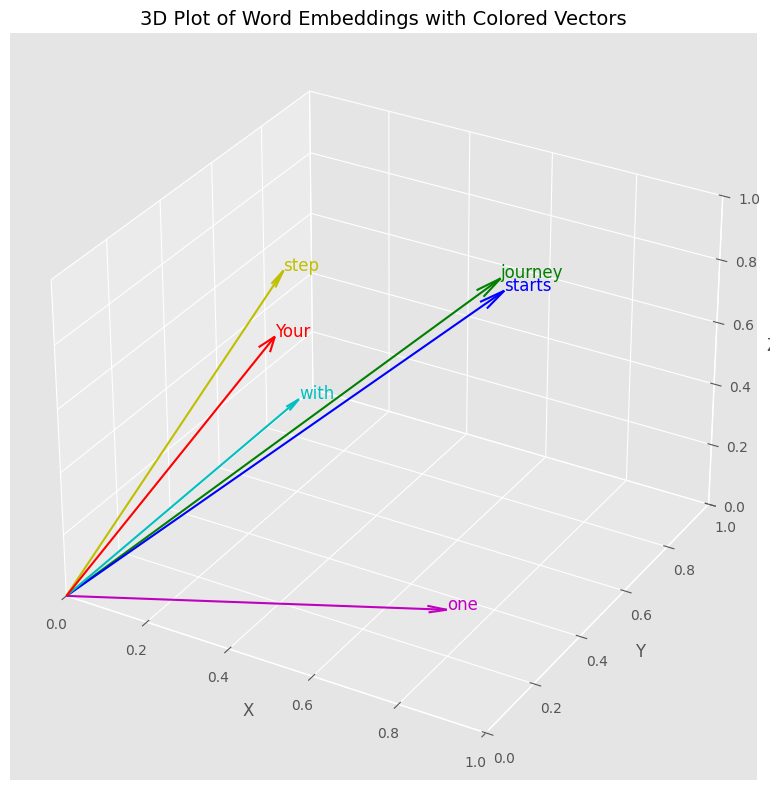

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("ggplot")

words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

if isinstance(inputs, torch.Tensor):
    x_coords = inputs[:, 0].numpy()
    y_coords = inputs[:, 1].numpy()
    z_coords = inputs[:, 2].numpy()
else:
    x_coords = inputs[:, 0]
    y_coords = inputs[:, 1]
    z_coords = inputs[:, 2]

# 🔵 Increased plot size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y']

for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=12, color=color)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors', fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
query = inputs[4]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935])


In [4]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention Weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention Weights:  tensor([0.1436, 0.2219, 0.2245, 0.1090, 0.2088, 0.0921])
Sum:  tensor(1.0000)


In [5]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention Weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention Weights:  tensor([0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295])
Sum:  tensor(1.)


In [6]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)
print("Attention Weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention Weights:  tensor([0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295])
Sum:  tensor(1.)


In [7]:
query = inputs[4]
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2+=attn_weights_2[i] * x_i
print(context_vec_2)

tensor([0.4671, 0.5910, 0.5266])


In [8]:
attn_scores = torch.empty(6, 6)
for i , x_i in enumerate(inputs):
    for j , x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [9]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [10]:
attn_weights = torch.softmax(attn_scores, dim = -1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [11]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row: ", row_2_sum)
print("All row sum: ", attn_weights.sum(dim=-1))

Row:  1.0
All row sum:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [12]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [13]:
print("Previos 2nd context vector: ", context_vec_2)

Previos 2nd context vector:  tensor([0.4671, 0.5910, 0.5266])


In [14]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [15]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [16]:
query_2  = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [17]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query

In [18]:
print("Key Shape: ", keys.shape)
print("Values Shape: ", values.shape)
print("Queries Shape: ", queries.shape)

Key Shape:  torch.Size([6, 2])
Values Shape:  torch.Size([6, 2])
Queries Shape:  torch.Size([6, 2])


In [19]:
keys_2 = keys[1]
attn_score_2 = query_2.dot(keys_2)
print(attn_score_2)

tensor(1.8524)


In [20]:
attn_scores_2  = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [21]:
import torch
import numpy as np

tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:\n", softmax_result)

scaled_tensor = tensor * 7
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("\nSoftmax after scaling (tensor * 8):\n", softmax_scaled_result)

Softmax without scaling:
 tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

Softmax after scaling (tensor * 8):
 tensor([0.0460, 0.0056, 0.1865, 0.0056, 0.7563])


In [22]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim = -1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [23]:
context_vec_2 = attn_weights_2 @ values

In [24]:
print(context_vec_2)

tensor([0.3061, 0.8210])


In [25]:
import torch.nn as nn

In [26]:
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
        self.W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
        self.W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

    def forward(self, x):
        keys = x @ self.W_key
        values = x @ self.W_value
        queries = x @ self.W_query
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1] ** 0.5, dim = -1
        )
        context_vec = attn_weights @ values
        return context_vec

In [27]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [28]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1] ** 0.5, dim = -1
        )
        context_vec = attn_weights @ values
        return context_vec

In [29]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [30]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [31]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [32]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [33]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [34]:
row_sums = masked_simple.sum(dim = -1, keepdim = True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [35]:
x = torch.tensor([-np.inf, 2.0, 3.0])
result = torch.softmax(x, dim = 0)
print(result)

tensor([0.0000, 0.2689, 0.7311])


In [36]:
torch.__version__

'2.8.0+cu126'

In [37]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal = 1)
masked = attn_scores.masked_fill(mask.bool(), -np.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [38]:
attn_weights = torch.softmax(masked / keys.shape[-1] ** 0.5, dim = -1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [39]:
attn_weights @ values

tensor([[0.1855, 0.8812],
        [0.2795, 0.9361],
        [0.3133, 0.9508],
        [0.2994, 0.8595],
        [0.2702, 0.7554],
        [0.2772, 0.7618]], grad_fn=<MmBackward0>)

In [40]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [41]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


In [42]:
batch = torch.stack((inputs, inputs), dim  = 0 )
print(batch.shape)

torch.Size([2, 6, 3])


In [43]:
inputs.shape

torch.Size([6, 3])

In [44]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill(self.mask.bool()[:num_tokens, :num_tokens], -np.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec



In [45]:
torch.manual_seed(123)
context_length  = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("Shape of the Context Vector : ",context_vecs.shape)

Shape of the Context Vector :  torch.Size([2, 6, 2])


In [46]:
class MultiheadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(
                d_in, d_out, context_length, dropout, qkv_bias = False
            )
            for _ in range(num_heads)]
        )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim = -1)

In [47]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiheadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vec = mha(batch)
print(context_vec)
print("Context Vector Shape: ", context_vec.shape)

tensor([[[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.5337, -0.1051,  0.5085,  0.3508],
         [-0.5323, -0.1080,  0.5084,  0.3508],
         [-0.5323, -0.1079,  0.5084,  0.3506],
         [-0.5297, -0.1076,  0.5074,  0.3471],
         [-0.5311, -0.1066,  0.5076,  0.3446],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
Context Vector Shape:  torch.Size([2, 6, 4])


In [48]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        assert(d_out % num_heads == 0 ), "d_out must be divisible by num heads"
        self.d_out  = d_out
        self.num_heads = num_heads
        self.head_dims = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length), diagonal = 1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys  = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dims)
        values = values.view(b, num_tokens, self.num_heads, self.head_dims)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dims)

        keys = keys.transpose(1, 2)
        values = values.transpose(1, 2)
        queries = queries.transpose(1, 2)

        attn_scores  = queries @ keys.transpose(2, 3)

        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill_(mask_bool , -np.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim  = -1)

        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2)

        context_vec = context_vec.contiguous().view(b , num_tokens, self.d_out)

        context_vec = self.out_proj(context_vec)
        return context_vec

In [49]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vec = mha(batch)
print(context_vec)
print("Context Vector Shape: ", context_vec.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
Context Vector Shape:  torch.Size([2, 6, 2])
